In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 107 files belonging to 3 classes.
Found 107 files belonging to 3 classes.
Found 107 files belonging to 3 classes.


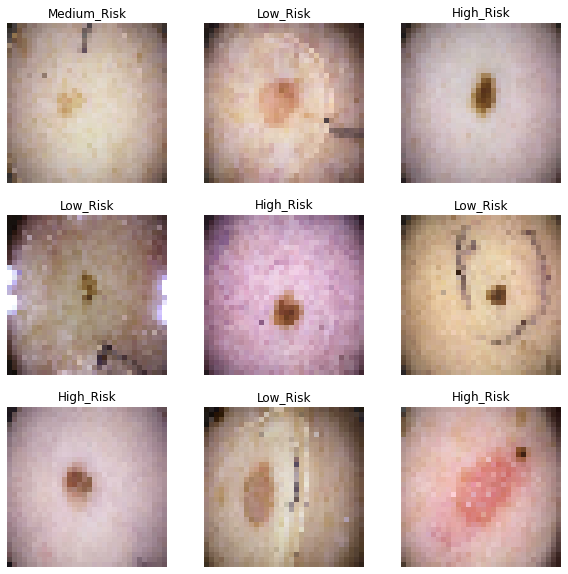

In [10]:
class_names = ["High_Risk", "Medium_Risk", "Low_Risk"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [12]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [13]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
6/6 [==============================] - 2s 151ms/step - loss: 1.0965 - accuracy: 0.3364 - val_loss: 1.0844 - val_accuracy: 0.4112
Epoch 2/10
6/6 [==============================] - 1s 109ms/step - loss: 1.0850 - accuracy: 0.4019 - val_loss: 1.0791 - val_accuracy: 0.4019
Epoch 3/10
6/6 [==============================] - 1s 110ms/step - loss: 1.0844 - accuracy: 0.4019 - val_loss: 1.0779 - val_accuracy: 0.4019
Epoch 4/10
6/6 [==============================] - 1s 115ms/step - loss: 1.0773 - accuracy: 0.4019 - val_loss: 1.0741 - val_accuracy: 0.4019
Epoch 5/10
6/6 [==============================] - 1s 117ms/step - loss: 1.0746 - accuracy: 0.4019 - val_loss: 1.0680 - val_accuracy: 0.4112
Epoch 6/10
6/6 [==============================] - 1s 114ms/step - loss: 1.0710 - accuracy: 0.4112 - val_loss: 1.0608 - val_accuracy: 0.4393
Epoch 7/10
6/6 [==============================] - 1s 122ms/step - loss: 1.0622 - accuracy: 0.4019 - val_loss: 1.0566 - val_accuracy: 0.4019
Epoch 8/10
6/6 [====

In [14]:
model.evaluate(test_ds)

6/6 [==============================] - 1s 3ms/step - loss: 0.9962 - accuracy: 0.6355


[0.9961845874786377, 0.6355140209197998]

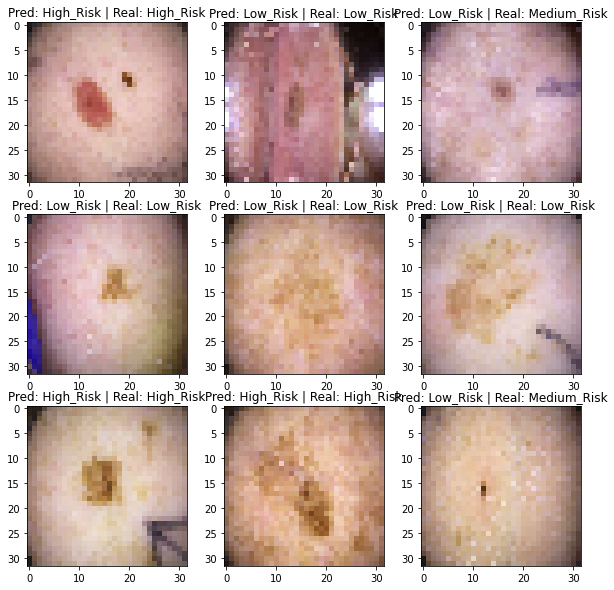

In [15]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\tejen\AppData\Local\Temp\tmpji4jbszd\assets


INFO:tensorflow:Assets written to: C:\Users\tejen\AppData\Local\Temp\tmpji4jbszd\assets
